In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [4]:
house_data = pd.read_csv('/content/drive/MyDrive/DeepLearningExam/data/kc_house_data.csv')

In [5]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
house_data.shape

(21597, 21)

In [7]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
house_data.head(2).T

,0,1
id,7129300520,6414100192
date,10/13/2014,12/9/2014
price,221900.0,538000.0
bedrooms,3,3
bathrooms,1.0,2.25
sqft_living,1180,2570
sqft_lot,5650,7242
floors,1.0,2.0
waterfront,0,0
view,0,0


In [9]:
house_data = house_data.drop(['id','date','yr_built','yr_renovated','lat','long'], axis = 1)

In [10]:
house_data.head().T

,0,1,2,3,4
price,221900.0,538000.00,180000.0,604000.0,510000.0
bedrooms,3.0,3.00,2.0,4.0,3.0
bathrooms,1.0,2.25,1.0,3.0,2.0
sqft_living,1180.0,2570.00,770.0,1960.0,1680.0
sqft_lot,5650.0,7242.00,10000.0,5000.0,8080.0
floors,1.0,2.00,1.0,1.0,1.0
waterfront,0.0,0.00,0.0,0.0,0.0
view,0.0,0.00,0.0,0.0,0.0
condition,3.0,3.00,3.0,5.0,3.0
grade,7.0,7.00,6.0,7.0,8.0


In [11]:
# Numpy Arrray
# Min Max Scalar
# Split
# Model
# Visualisation
# Evaluation

In [12]:
house_data.iloc[:,:1]

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21592,360000.0
21593,400000.0
21594,402101.0
21595,400000.0


In [13]:
X = house_data.iloc[:,1:].values
y = house_data.iloc[:,:1].values


In [14]:
# Splitting the data into train & test

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17277, 14), (4320, 14), (17277, 1), (4320, 1))

In [17]:
# Scalling the data usng minmax scaler

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler_X = MinMaxScaler()
scaler_X.fit(X_train) 

scaler_y = MinMaxScaler()
scaler_y.fit(y_train) 

MinMaxScaler()

In [20]:
# transform Independent & target variables
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.transform(y_train)
y_test = scaler_y.transform(y_test)

In [21]:
# Building model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'linear')
])

In [22]:
model.compile(loss = tf.keras.losses.mse, optimizer = tf.keras.optimizers.Adam(),
              metrics = ['mse'])

In [23]:
model_epochs = model.fit(X_train, y_train, epochs = 20, batch_size=50)

Epoch 1/20
346/346 [==============================] - 2s 2ms/step - loss: 0.0021 - mse: 0.0021
Epoch 2/20
346/346 [==============================] - 1s 2ms/step - loss: 8.4486e-04 - mse: 8.4486e-04
Epoch 3/20
346/346 [==============================] - 1s 2ms/step - loss: 7.8803e-04 - mse: 7.8803e-04
Epoch 4/20
346/346 [==============================] - 1s 2ms/step - loss: 7.6061e-04 - mse: 7.6061e-04
Epoch 5/20
346/346 [==============================] - 1s 2ms/step - loss: 7.3070e-04 - mse: 7.3070e-04
Epoch 6/20
346/346 [==============================] - 1s 2ms/step - loss: 7.1649e-04 - mse: 7.1649e-04
Epoch 7/20
346/346 [==============================] - 1s 2ms/step - loss: 7.1082e-04 - mse: 7.1082e-04
Epoch 8/20
346/346 [==============================] - 1s 2ms/step - loss: 6.9564e-04 - mse: 6.9564e-04
Epoch 9/20
346/346 [==============================] - 1s 2ms/step - loss: 6.8472e-04 - mse: 6.8472e-04
Epoch 10/20
346/346 [==============================] - 1s 2ms/step - loss: 6.8573

In [24]:
## Evaluating the model

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                480       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,569
Trainable params: 1,569
Non-trainable params: 0
_________________________________________________________________


In [26]:
model_epochs.history.keys()

dict_keys(['loss', 'mse'])

Text(0, 0.5, 'Training Loss')

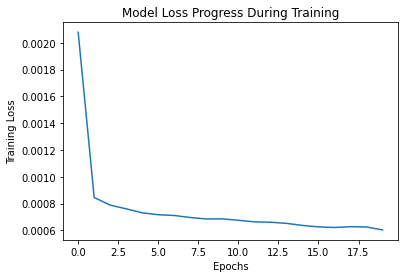

In [27]:
plt.plot(model_epochs.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')

In [28]:
# LEts have validation set as well

In [29]:
model_epochs_validation = model.fit(X_train, y_train, epochs=25, batch_size = 50, validation_split=0.2)

Epoch 1/25
277/277 [==============================] - 1s 3ms/step - loss: 6.0741e-04 - mse: 6.0741e-04 - val_loss: 5.7415e-04 - val_mse: 5.7415e-04
Epoch 2/25
277/277 [==============================] - 1s 2ms/step - loss: 6.0518e-04 - mse: 6.0518e-04 - val_loss: 5.8864e-04 - val_mse: 5.8864e-04
Epoch 3/25
277/277 [==============================] - 1s 2ms/step - loss: 5.8972e-04 - mse: 5.8972e-04 - val_loss: 5.7825e-04 - val_mse: 5.7825e-04
Epoch 4/25
277/277 [==============================] - 1s 2ms/step - loss: 5.8389e-04 - mse: 5.8389e-04 - val_loss: 5.7971e-04 - val_mse: 5.7971e-04
Epoch 5/25
277/277 [==============================] - 1s 2ms/step - loss: 5.8131e-04 - mse: 5.8131e-04 - val_loss: 5.9987e-04 - val_mse: 5.9987e-04
Epoch 6/25
277/277 [==============================] - 1s 2ms/step - loss: 5.7118e-04 - mse: 5.7118e-04 - val_loss: 5.9593e-04 - val_mse: 5.9593e-04
Epoch 7/25
277/277 [==============================] - 1s 2ms/step - loss: 5.7926e-04 - mse: 5.7926e-04 - val_los

In [30]:
model_epochs_validation.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

Text(0, 0.5, 'Training & Validation Loss')

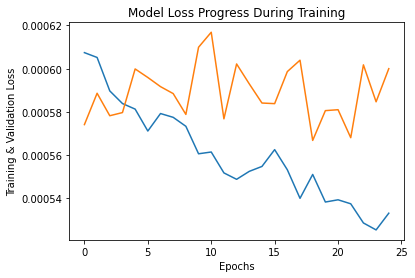

In [31]:
plt.plot(model_epochs_validation.history['loss'])
plt.plot(model_epochs_validation.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training & Validation Loss')

In [32]:
model.get_weights()

[array([[ 1.08684696e-01, -1.99303880e-01,  2.09410548e-01,
         -7.82331824e-02, -3.83009985e-02, -2.36003533e-01,
         -3.09659149e-02,  1.17297463e-01, -8.24398845e-02,
          2.10229397e-01,  3.72464776e-01,  1.51410913e-02,
         -2.97702819e-01, -2.47739747e-01,  4.83308583e-02,
         -1.68897957e-01, -2.23539591e-01, -2.00606644e-01,
         -1.27015449e-02, -9.08164978e-02,  2.02295423e-01,
          6.39234260e-02, -7.13640526e-02, -2.09194213e-01,
          1.33924246e-01,  9.44053382e-02,  2.75926918e-01,
          5.83376288e-01,  1.14046685e-01, -1.36375591e-01,
          3.34559716e-02,  1.02477618e-01],
        [-1.16442241e-01, -5.61223701e-02,  2.28240982e-01,
          3.08027774e-01, -1.48803577e-01, -1.97160274e-01,
          1.27943724e-01,  9.71513391e-02, -1.29824337e-02,
          9.57837403e-02, -3.09455007e-01,  2.41792113e-01,
         -1.36149898e-01, -1.27844974e-01,  1.71120405e-01,
         -2.24835873e-01,  4.21963096e-01,  2.21878111e-

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                480       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,569
Trainable params: 1,569
Non-trainable params: 0
_________________________________________________________________


In [2]:
!pip install mlxtend 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
!pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.9 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [38]:
from mlxtend.plotting import plot_decision_regions

In [1]:
# plot_decision_regions(X[:,3:4],y.reshape(-1).astype('int'), clf = model, legend = 2)

In [46]:
y.reshape(-1).shape

(21597,)

In [42]:
X.shape

(21597, 14)

In [45]:
type(y)

numpy.ndarray

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


IndexError: ignored

In [51]:
X

array([[3.0000e+00, 1.0000e+00, 1.1800e+03, ..., 9.8178e+04, 1.3400e+03,
        5.6500e+03],
       [3.0000e+00, 2.2500e+00, 2.5700e+03, ..., 9.8125e+04, 1.6900e+03,
        7.6390e+03],
       [2.0000e+00, 1.0000e+00, 7.7000e+02, ..., 9.8028e+04, 2.7200e+03,
        8.0620e+03],
       ...,
       [2.0000e+00, 7.5000e-01, 1.0200e+03, ..., 9.8144e+04, 1.0200e+03,
        2.0070e+03],
       [3.0000e+00, 2.5000e+00, 1.6000e+03, ..., 9.8027e+04, 1.4100e+03,
        1.2870e+03],
       [2.0000e+00, 7.5000e-01, 1.0200e+03, ..., 9.8144e+04, 1.0200e+03,
        1.3570e+03]])